In [140]:
from matplotlib import pyplot as plt
import pickle
import numpy as np
from pathlib import Path
import os
import json

In [141]:
root_dir = "{}/results".format(str(os.getcwd()))
exp_name = "exp_003_2023-08-17-22-03-34"
results_dir = root_dir + "/" + exp_name
file = results_dir +  "/history.pkl"
with open(file, 'rb') as handle:
    history = pickle.load(handle)

In [142]:
test_settings_path = results_dir + "/test_settings_{}".format(exp_name[4:7]) + ".json"
with open(test_settings_path, "r", encoding="utf8") as f:
    test_settings = json.load(f)

In [143]:
print(history.keys())
time = np.array(history["time"])
time = time - time[0]

dict_keys(['time', 'q', 'dq', 'corners_raw', 'corner_depths_raw', 'obstacle_corner_in_world', 'obstacle_corner_in_image', 'error_position', 'cbf', 'joint_vel_command', 'info', 'd_hat_dob', 'd_true', 'loop_time', 'ekf_estimates', 'dob_dt', 'ekf_dt'])


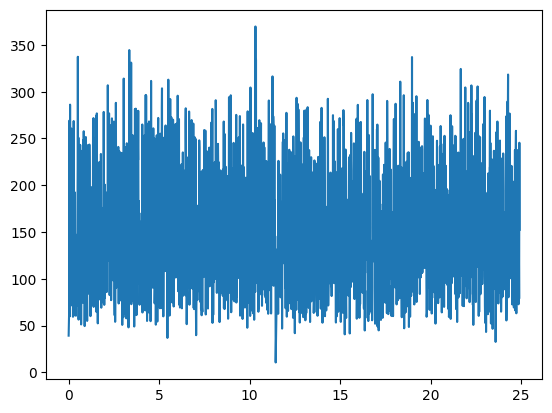

In [144]:
loop_time = np.array(history['loop_time'])
plt.plot(time-time[0], 1/loop_time)
plt.savefig(os.path.join(results_dir, 'plot_loop_frequency.png'))

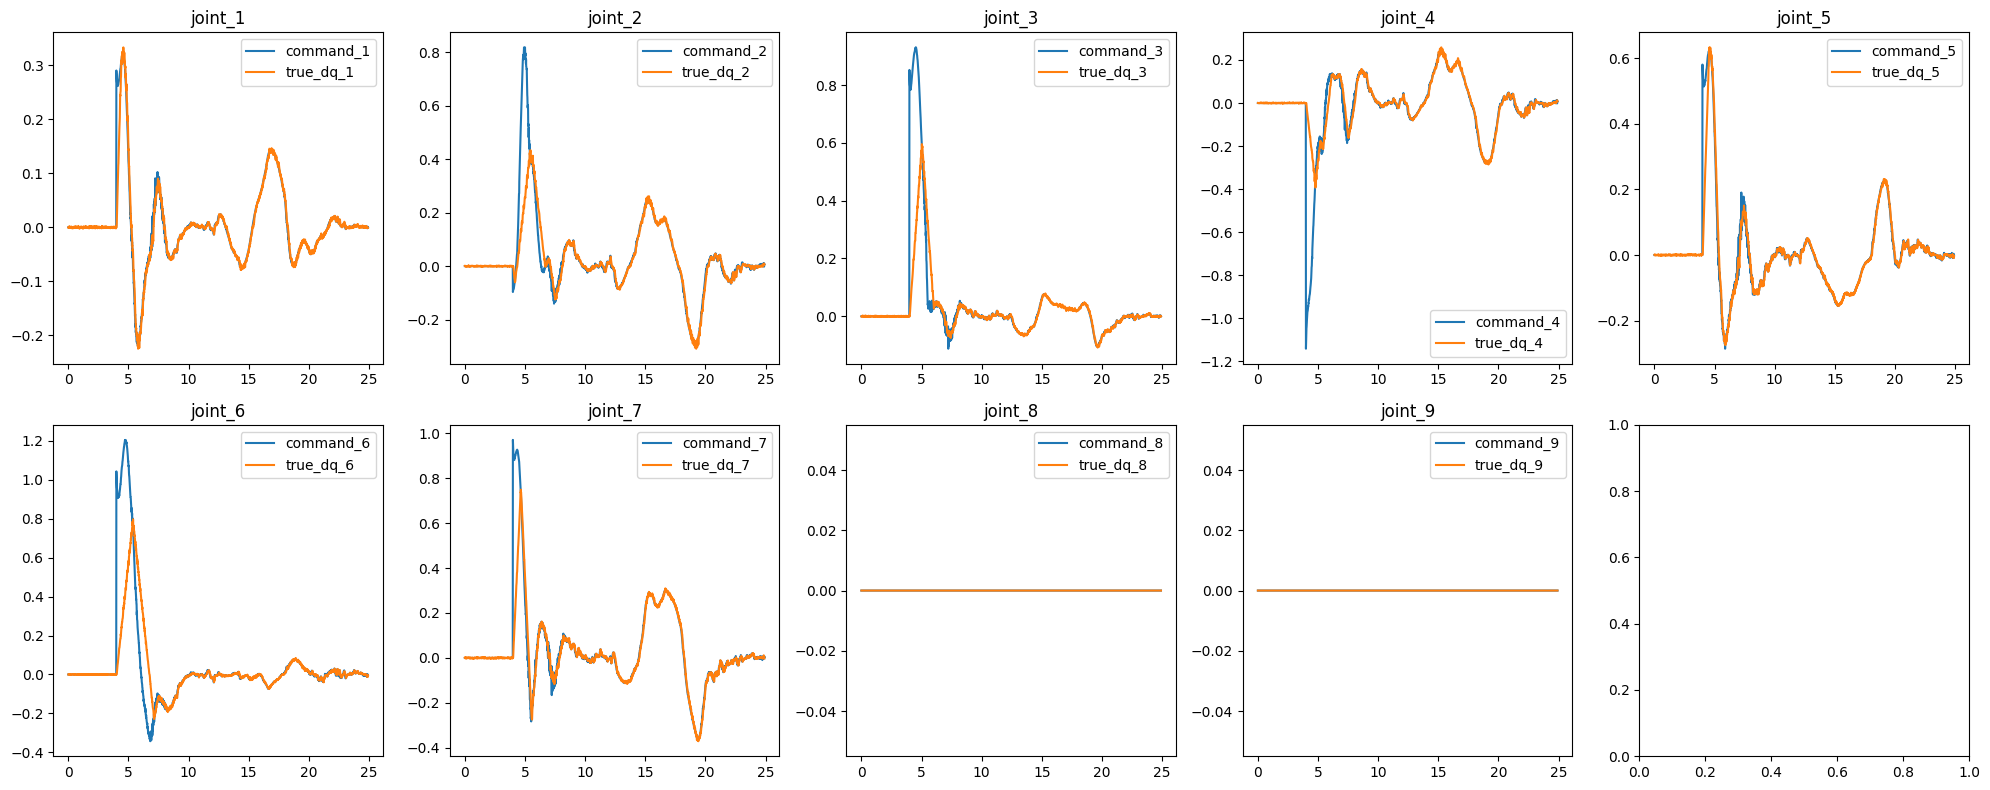

In [145]:
joint_vel_command = np.array(history["joint_vel_command"])
dq = np.array(history['dq'])
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
for i in range(joint_vel_command.shape[1]):
    plt.subplot(2, 5, i+1)
    plt.plot(time, joint_vel_command[:,i], label="command_{}".format(i+1))
    plt.plot(time, dq[:,i], label="true_dq_{}".format(i+1))
    plt.title("joint_{}".format(i+1))
    plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(results_dir, 'plot_dq.png'))

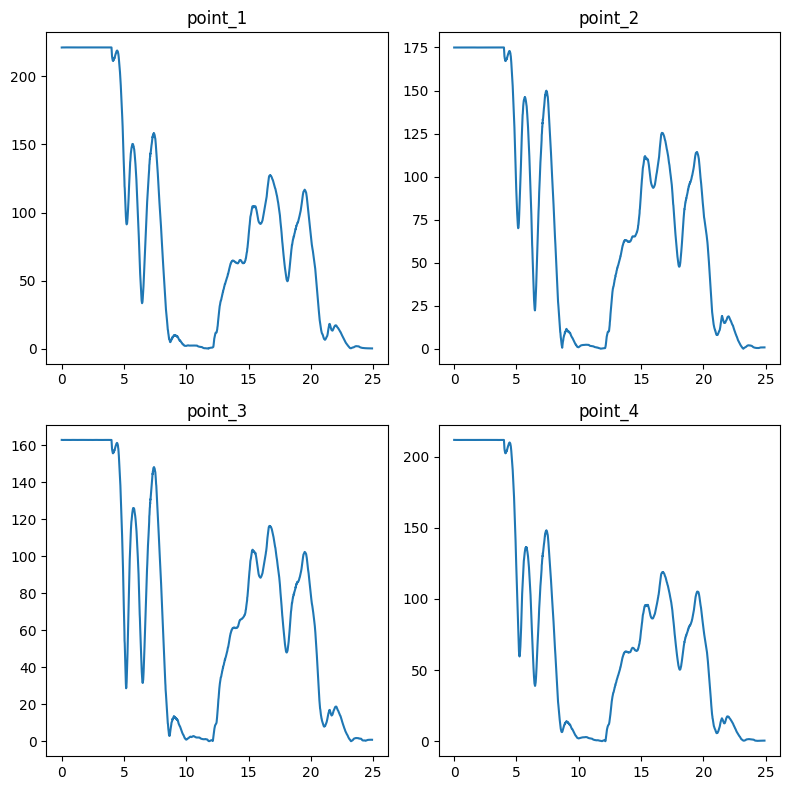

In [146]:
error_position = np.array(history['error_position'])
error_position = np.sqrt(error_position)
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
for i in range(error_position.shape[1]):
    plt.subplot(2, 2, i+1)
    plt.plot(time, error_position[:,i], label="point_{}".format(i+1))
    plt.title("point_{}".format(i+1))
plt.tight_layout()
plt.savefig(os.path.join(results_dir, 'plot_error_position.png'))

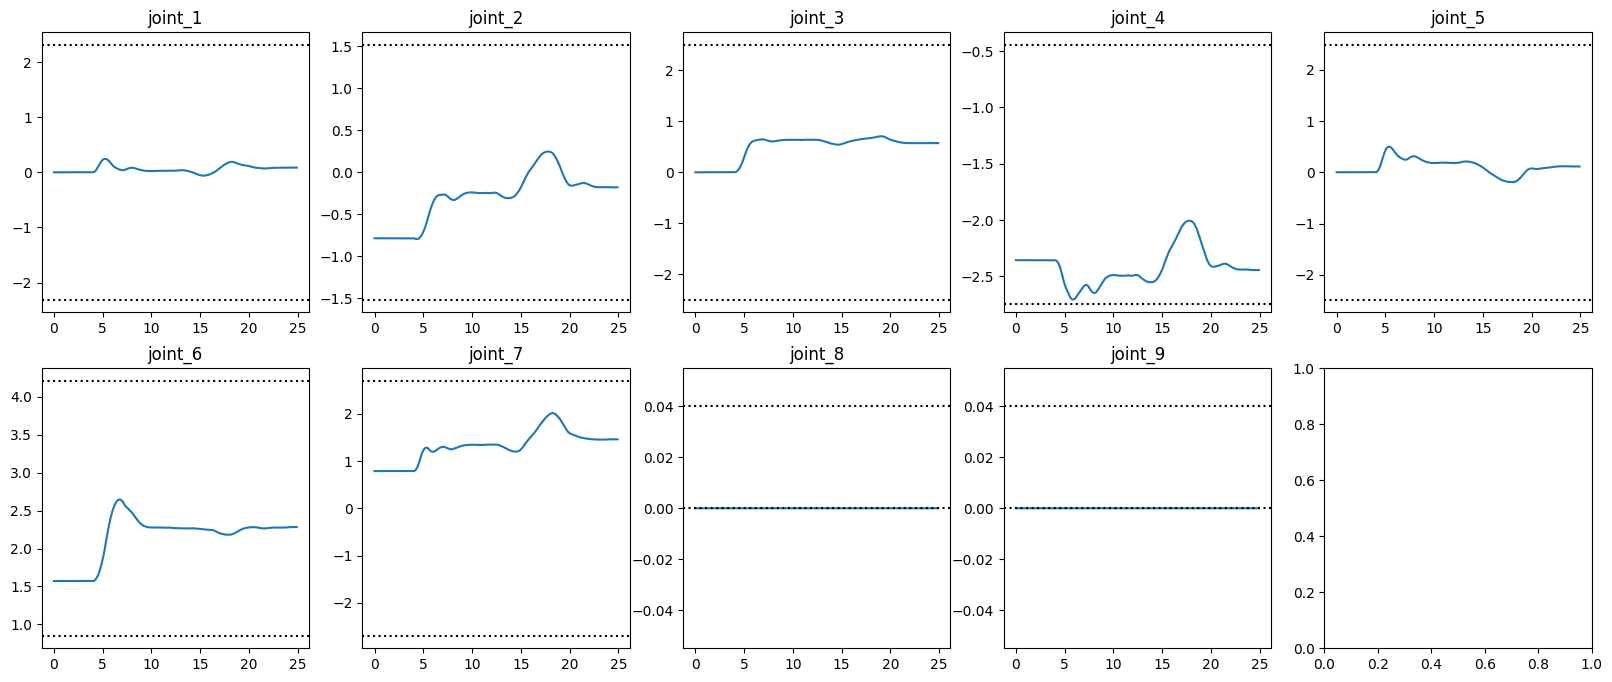

In [147]:
q = np.array(history['q'])
joint_ub = np.array(test_settings["joint_limits_config"]["ub"])
joint_lb = np.array(test_settings["joint_limits_config"]["lb"])
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
for i in range(q.shape[1]):
    plt.subplot(2, 5, i+1)
    plt.plot(time, q[:,i], label="joint_{}".format(i+1))
    plt.axhline(y = joint_ub[i], color = 'black', linestyle = 'dotted')
    plt.axhline(y = joint_lb[i], color = 'black', linestyle = 'dotted')
    plt.title("joint_{}".format(i+1))
plt.savefig(os.path.join(results_dir, 'plot_q.png'))

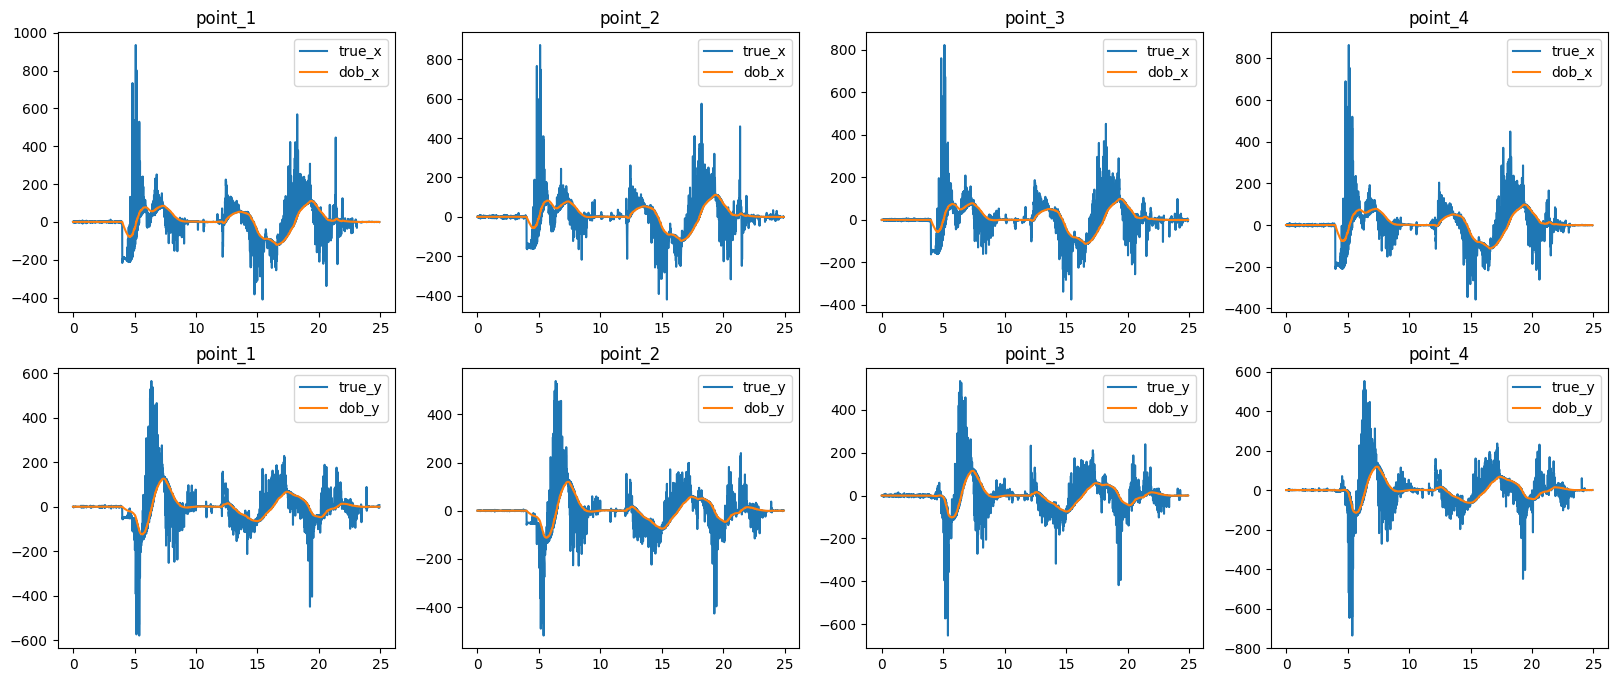

In [148]:
d_true_values = np.array(history['d_true'])
dist_observer = np.array(history['d_hat_dob'])
fig, axs = plt.subplots(2, 4, figsize=(20, 8))
for i in range(4):
    plt.subplot(2, 4, i+1)
    plt.plot(time, d_true_values[:,2*i], label="true_x")
    plt.plot(time, dist_observer[:,2*i], label="dob_x")
    plt.legend()
    plt.title("point_{}".format(i+1))
    plt.subplot(2, 4, i+5)
    plt.plot(time, d_true_values[:,2*i+1], label="true_y")
    plt.plot(time, dist_observer[:,2*i+1], label="dob_y")
    plt.legend()
    plt.title("point_{}".format(i+1))
plt.savefig(os.path.join(results_dir, 'plot_dob_d_hat.png'))


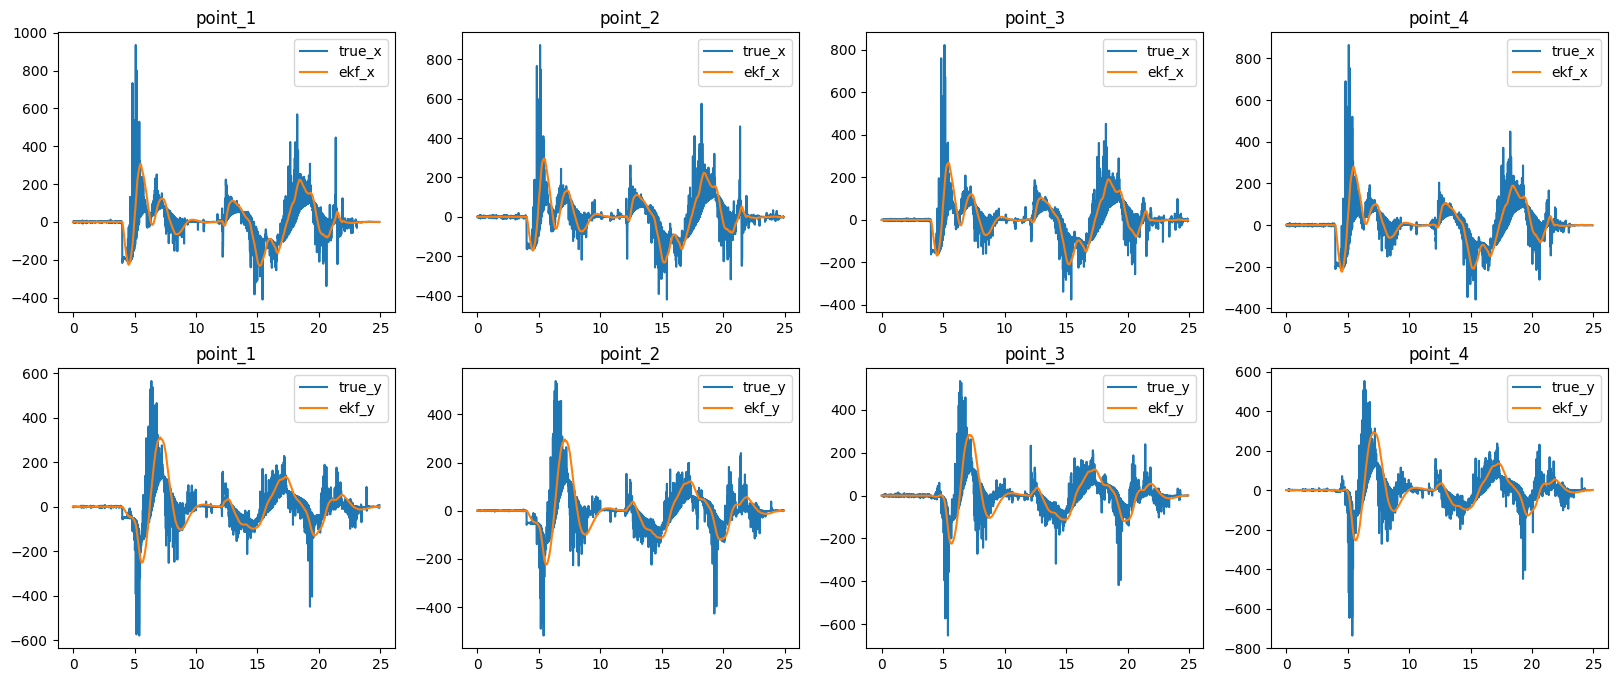

In [149]:
ekf_estimates = np.array(history['ekf_estimates'])
fig, axs = plt.subplots(2, 4, figsize=(20, 8))
for i in range(4):
    plt.subplot(2, 4, i+1)
    plt.plot(time, d_true_values[:,2*i], label="true_x")
    plt.plot(time, ekf_estimates[:,i,3], label="ekf_x")
    plt.legend()
    plt.title("point_{}".format(i+1))
    plt.subplot(2, 4, i+5)
    plt.plot(time, d_true_values[:,2*i+1], label="true_y")
    plt.plot(time, ekf_estimates[:,i,4], label="ekf_y")
    plt.legend()
    plt.title("point_{}".format(i+1))
plt.savefig(os.path.join(results_dir, 'plot_ekf_d_hat.png'))

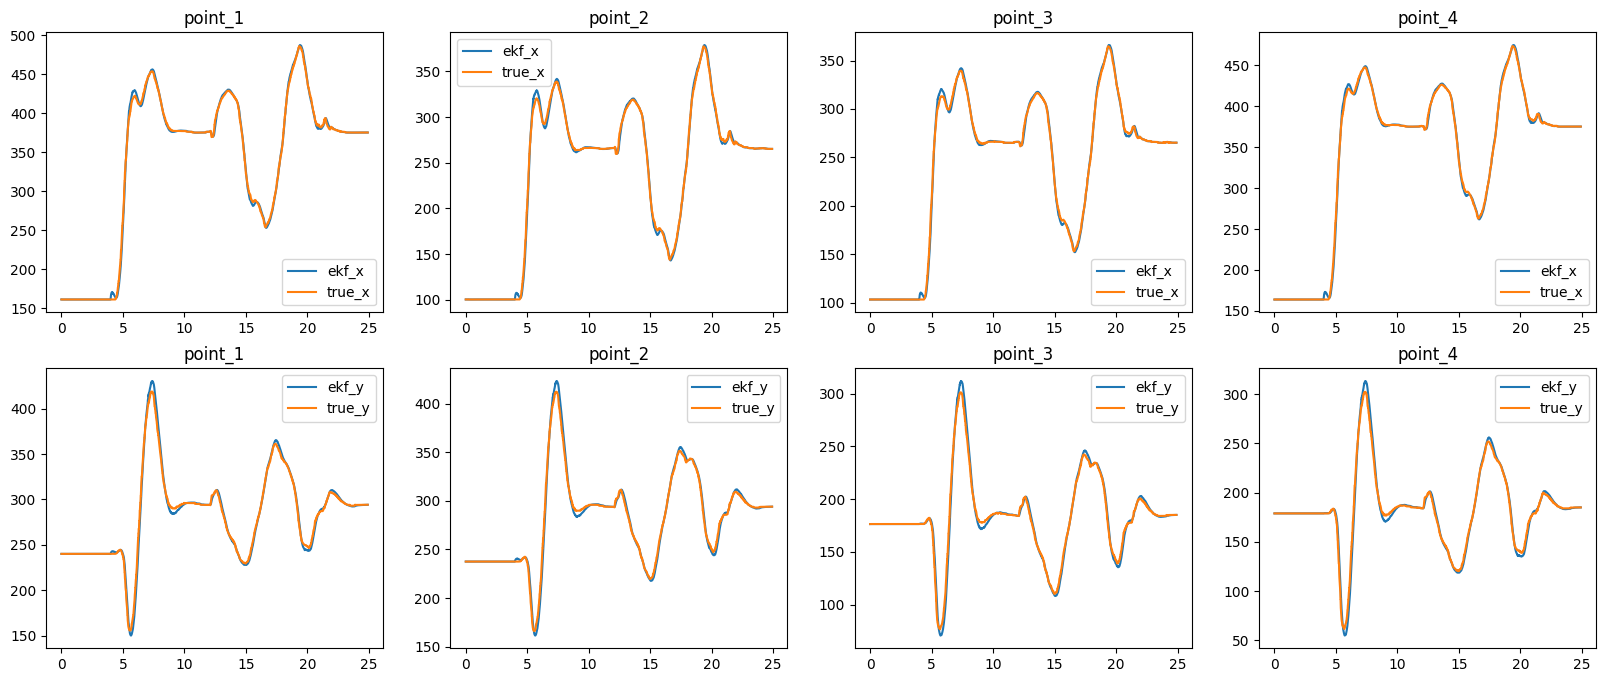

In [150]:
corners_values = np.array(history['corners_raw'])
fig, axs = plt.subplots(2, 4, figsize=(20, 8))
for i in range(4):
    plt.subplot(2, 4, i+1)
    plt.plot(time, ekf_estimates[:,i,0], label="ekf_x")
    plt.plot(time, corners_values[:,i,0], label="true_x")
    plt.legend()
    plt.title("point_{}".format(i+1))
    plt.subplot(2, 4, i+5)
    plt.plot(time, ekf_estimates[:,i,1], label="ekf_y")
    plt.plot(time, corners_values[:,i,1], label="true_y")
    plt.legend()
    plt.title("point_{}".format(i+1))
plt.savefig(os.path.join(results_dir, 'plot_ekf_corners.png'))


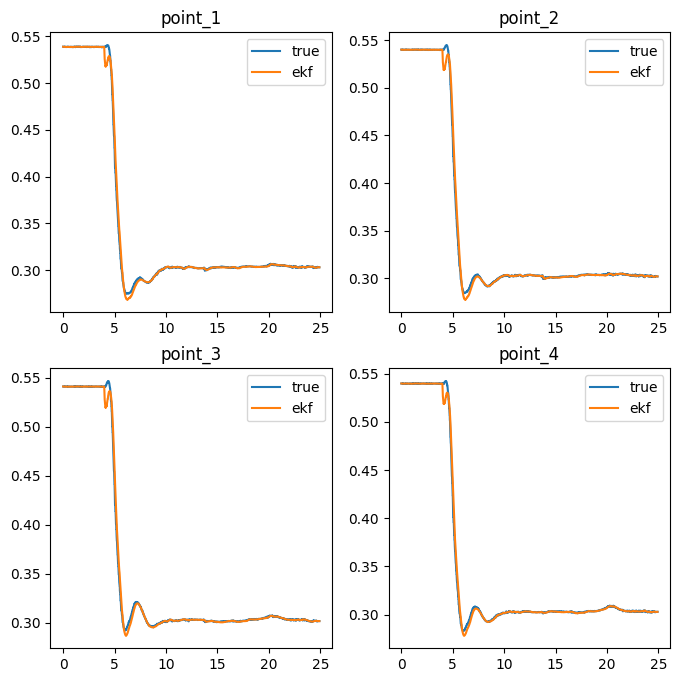

In [151]:
depth_values = np.array(history['corner_depths_raw'])
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(time, depth_values[:,i], label="true")
    plt.plot(time, ekf_estimates[:,i,2], label="ekf")
    plt.legend()
    plt.title("point_{}".format(i+1))
plt.savefig(os.path.join(results_dir, 'plot_ekf_depths.png'))

